In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!/opt/anaconda3/bin/python -m pip install wordcloud

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 326.8 kB/s eta 0:00:40
     --------------------------------------- 0.1/12.8 MB 508.4 kB/s eta 0:00:26
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/12.8 MB 2.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/12.8 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 2.9 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.8 MB 3.3 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/12.8 MB 3.4 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/12.8 MB 3.4 MB/s eta 

The system cannot find the path specified.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import spacy
import re
from wordcloud import WordCloud
from collections import Counter
from collections import defaultdict
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# Load the CSV file into a pandas DataFrame
animes = pd.read_csv('animes.csv')
reviews = pd.read_csv('reviews.csv')
profile = pd.read_csv('profiles.csv')

# Remove duplicate rows based on uid
animes = animes.drop_duplicates(subset = 'uid')

In [4]:
animes.head(5)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [5]:
profile.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [6]:
a_reviews=animes.merge(reviews,on='uid')
a_rev_prof=a_reviews.merge(profile,on='profile')
a_rev_prof

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,...,profile,anime_uid,text,score_y,scores,link_y,gender,birthday,favorites_anime,link
0,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,itaeon,6811,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,Female,Jan 4,"['12531', '11843', '11771', '457', '249']",https://myanimelist.net/profile/itaeon
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,itaeon,6811,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,Female,Jan 4,"['12531', '11843', '11771', '457', '249']",https://myanimelist.net/profile/itaeon
2,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,itaeon,6811,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,Female,Jan 4,"['12531', '11843', '11771', '457', '249']",https://myanimelist.net/profile/itaeon
3,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,itaeon,6811,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,Female,Jan 4,"['12531', '11843', '11771', '457', '249']",https://myanimelist.net/profile/itaeon
4,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,itaeon,6811,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,Female,Jan 4,"['12531', '11843', '11771', '457', '249']",https://myanimelist.net/profile/itaeon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26689,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,...,Ryuu_Hatake,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=35828,Male,May 29,"['811', '1735', '2167', '9513', '9919']",https://myanimelist.net/profile/Ryuu_Hatake
26690,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,...,Ryuu_Hatake,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=35828,Male,May 29,"['811', '1735', '2167', '9513', '9919']",https://myanimelist.net/profile/Ryuu_Hatake
26691,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,...,Ryuu_Hatake,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=35828,Male,May 29,"['811', '1735', '2167', '9513', '9919']",https://myanimelist.net/profile/Ryuu_Hatake
26692,16934,Chuunibyou demo Koi ga Shitai!: Kirameki no......,Although Yuuta Togashi and Rikka Takanashi hav...,"['Comedy', 'Drama', 'Romance', 'School', 'Slic...","Jun 19, 2013",1.0,128400,883,1533.0,7.56,...,FallenHope,17,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=16934,Female,"Jan 10, 1996","['957', '5835', '4898', '136', '17']",htt

In [7]:
# Find duplicate rows based on the specified column
duplicate_rows = a_rev_prof[a_rev_prof.duplicated(subset=['title'], keep=False)]

# Drop duplicates
a_rev_prof = a_rev_prof.drop_duplicates()

print(duplicate_rows)

         uid                                              title  \
0      23273                            Shigatsu wa Kimi no Uso   
1      23273                            Shigatsu wa Kimi no Uso   
2      23273                            Shigatsu wa Kimi no Uso   
3      23273                            Shigatsu wa Kimi no Uso   
4      23273                            Shigatsu wa Kimi no Uso   
...      ...                                                ...   
26689  35828                                   Miira no Kaikata   
26690  35828                                   Miira no Kaikata   
26691  35828                                   Miira no Kaikata   
26692  16934  Chuunibyou demo Koi ga Shitai!: Kirameki no......   
26693  16934  Chuunibyou demo Koi ga Shitai!: Kirameki no......   

                                                synopsis  \
0      Music accompanies the path of the human metron...   
1      Music accompanies the path of the human metron...   
2      Music ac

In [8]:
# Create a defaultdict to count genres
hash_map = defaultdict(lambda: 0)

# Initialize an empty list to store genre lists for each row
genrelist = []

# Iterate over each row in the 'genre' column
for genres_str in a_rev_prof['genre']:
    # Remove the square brackets and split the string of genres into individual genres
    genres_list = [genre.strip() for genre in genres_str.strip('[]').split(',') if genre.strip()]
    # Iterate over each genre in the list of genres for the current row
    for genre in genres_list:
        # Increment the count of the genre in the hash_map
        hash_map[genre] += 1
    # Append the list of genres to genrelist
    genrelist.append(genres_list)

# Adding 'genre_list' column to the DataFrame
a_rev_prof['genre_list'] = genrelist

# Extract unique genres from the hash_map
all_genres = list(hash_map.keys())

# Drop the 'genre' column if it exists
if 'genre' in a_rev_prof.columns:
    a_rev_prof.drop(columns=['genre'], inplace=True)

# Display the unique genres
all_genres

["'Drama'",
 "'Music'",
 "'Romance'",
 "'School'",
 "'Shounen'",
 "'Sci-Fi'",
 "'Adventure'",
 "'Mystery'",
 "'Fantasy'",
 "'Action'",
 "'Supernatural'",
 "'Vampire'",
 "'Comedy'",
 "'Super Power'",
 "'Military'",
 "'Space'",
 "'Mecha'",
 "'Shoujo'",
 "'Slice of Life'",
 "'Demons'",
 "'Magic'",
 "'Horror'",
 "'Historical'",
 "'Parody'",
 "'Hentai'",
 "'Kids'",
 "'Samurai'",
 "'Police'",
 "'Seinen'",
 "'Cars'",
 "'Ecchi'",
 "'Harem'",
 "'Sports'",
 "'Martial Arts'",
 "'Game'",
 "'Psychological'",
 "'Josei'",
 "'Shounen Ai'",
 "'Dementia'",
 "'Thriller'",
 "'Shoujo Ai'",
 "'Yaoi'",
 "'Yuri'"]

After checking genre list we must clean the genre list by merging some multiple words into a single word and removing the ' ' 

In [9]:
def clean_genre(genre_list):
    replacements = {
        'sci-fi': 'sci-fi',
        'slice of life': 'slice-of-life',
        'super power': 'super-power',
        'shoujo ai': 'shoujo-ai',
        'shounen ai': 'shounen-ai',
        'martial arts': 'martial-arts'
    }
    
    cleaned_genres = [genre.strip().lower() for genre in genre_list]
    
    # Apply replacements to each genre
    for i, genre in enumerate(cleaned_genres):
        for term, replacement in replacements.items():
            cleaned_genres[i] = cleaned_genres[i].replace(term, replacement)
    
    return cleaned_genres

a_rev_prof['genre_list'] = a_rev_prof['genre_list'].apply(clean_genre)

In [10]:
# Flatten the list of lists into a single list of strings
genres_flat = [genre for sublist in a_rev_prof['genre_list'] for genre in sublist]

# Join the genres into a single string
text = " ".join(genres_flat)

# Display the cleaned text in the genre column
text

"'drama' 'music' 'romance' 'school' 'shounen' 'sci-fi' 'adventure' 'mystery' 'drama' 'fantasy' 'music' 'music' 'music' 'action' 'mystery' 'supernatural' 'vampire' 'comedy' 'mystery' 'school' 'super-power' 'adventure' 'supernatural' 'drama' 'action' 'sci-fi' 'adventure' 'military' 'sci-fi' 'space' 'drama' 'mecha' 'military' 'sci-fi' 'adventure' 'drama' 'romance' 'mecha' 'action' 'adventure' 'comedy' 'drama' 'sci-fi' 'space' 'comedy' 'sci-fi' 'shoujo' 'comedy' 'drama' 'romance' 'school' 'shoujo' 'slice-of-life' 'comedy' 'demons' 'romance' 'school' 'action' 'fantasy' 'military' 'sci-fi' 'adventure' 'fantasy' 'supernatural' 'shounen' 'action' 'adventure' 'drama' 'magic' 'romance' 'fantasy' 'mystery' 'comedy' 'supernatural' 'vampire' 'music' 'horror' 'school' 'action' 'military' 'sci-fi' 'super-power' 'drama' 'mecha' 'drama' 'fantasy' 'historical' 'romance' 'parody' 'super-power' 'hentai' 'comedy' 'magic' 'school' 'shoujo' 'sci-fi' 'adventure' 'space' 'drama' 'mecha' 'shounen' 'adventure' '

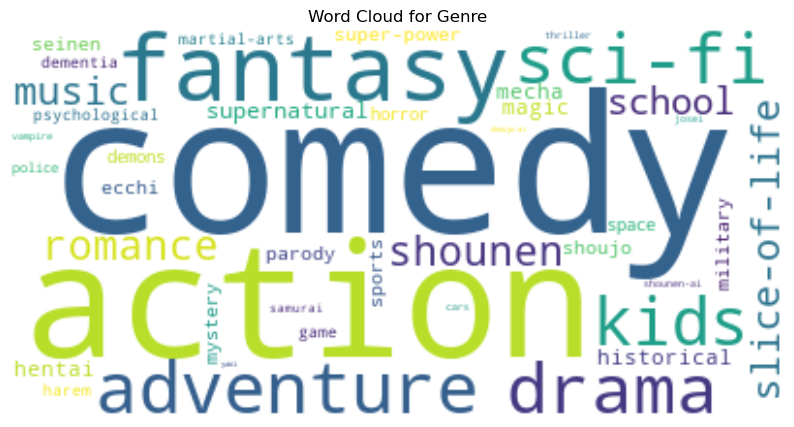

In [11]:
# Combine all genre lists into a single string
genre_text = " ".join(" ".join(genre for genre in genres) for genres in a_rev_prof['genre_list'])

# Replace any occurrences of "' '" with a single space to ensure proper word separation
genre_text = genre_text.replace("' '", " ")

# Count the occurrences of each genre
genre_counts = Counter(genre_text.split())

# Create a word cloud using the genre counts
wordcloud = WordCloud(background_color='white').generate_from_frequencies(genre_counts)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genre')
plt.show()


From the word cloud we can see the most frequent genre is Comedy, action and adventure. 

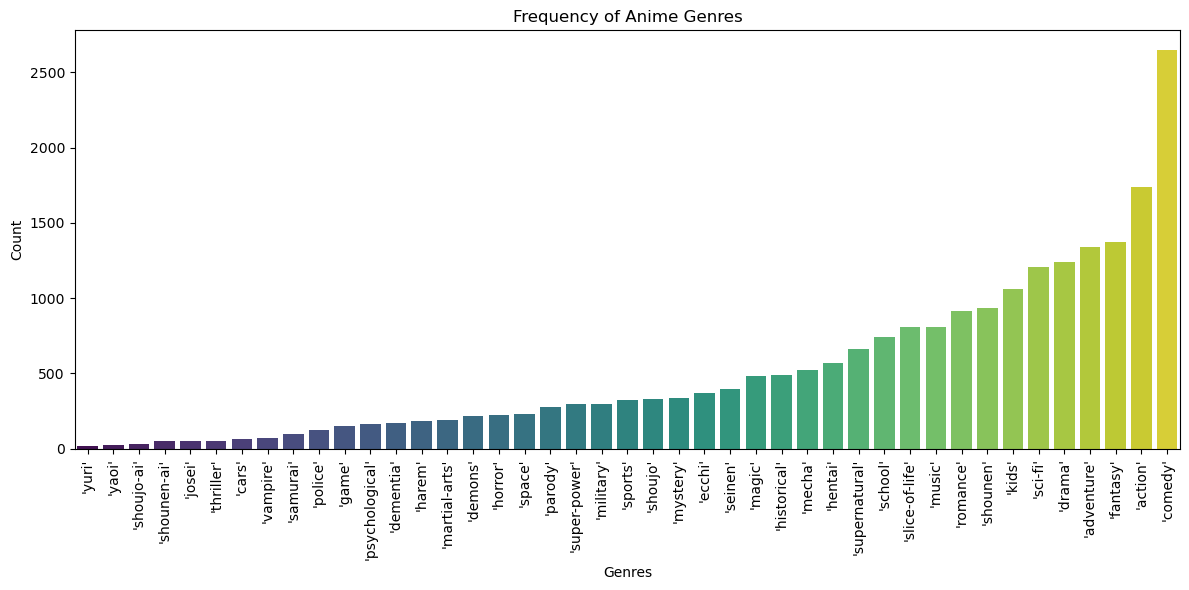

In [12]:
# Flatten the list of lists into a single list of strings
genres_flat = [genre for sublist in a_rev_prof['genre_list'] for genre in sublist]

# Join the genres into a single string
genres_text = " ".join(str(genre) for genre in genres_flat)

# Create a counter for the genres
genres_counter = Counter(genres_text.split())

# Convert the counter to a DataFrame
genres_df = pd.DataFrame.from_dict(genres_counter, orient='index', columns=['count'])
genres_df.index.name = 'Genres'

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_df.index, y='count', data=genres_df, palette="viridis" ,order=genres_df.sort_values('count').index)
plt.title('Frequency of Anime Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This Bar chart supports the word cloud

In [13]:
# Show the top 5 genres depending on the user's gender  
genders = ['Male', 'Female', 'Non-Binary']

top_genres_by_gender = {}

for gender in genders:
    subset = a_rev_prof[a_rev_prof['gender'] == gender]
    # Flatten the list of lists into a single list of strings
    genres_flat = [genre for sublist in subset['genre_list'] for genre in sublist]
    # Join the genres into a single string
    genres_text = " ".join(str(genre) for genre in genres_flat)
    # Count the occurrences of each genre
    count = Counter(genres_text.split()).most_common(5)
    top_genres_by_gender[gender] = count

# Print the top genres for each gender
for gender, top_genres in top_genres_by_gender.items():
    print(f"Top genres for \033[1m{gender}\033[0m:")
    for genre, count in top_genres:
        print(f"Genre: \033[1m{genre}\033[0m, Count: \033[1m{count}\033[0m")
    print()

Top genres for Male:
Genre: 'comedy', Count: 1471
Genre: 'action', Count: 945
Genre: 'fantasy', Count: 762
Genre: 'adventure', Count: 747
Genre: 'drama', Count: 682

Top genres for Female:
Genre: 'comedy', Count: 733
Genre: 'action', Count: 497
Genre: 'fantasy', Count: 382
Genre: 'adventure', Count: 380
Genre: 'drama', Count: 369

Top genres for Non-Binary:
Genre: 'kids', Count: 10
Genre: 'fantasy', Count: 6
Genre: 'music', Count: 6
Genre: 'comedy', Count: 4
Genre: 'romance', Count: 3



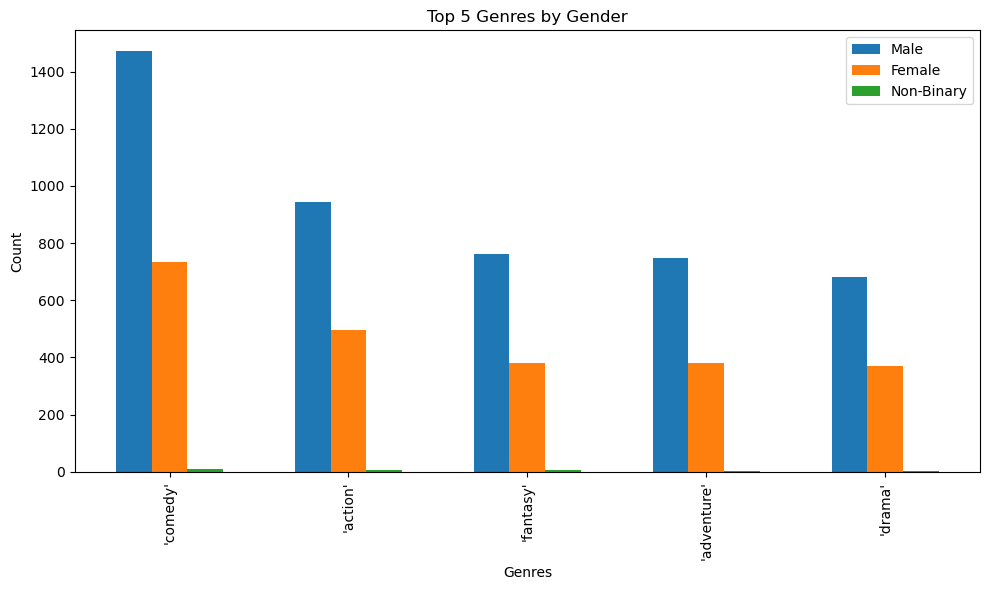

In [14]:
# Initialize dictionaries to store top genres and counts for each gender
top_genres_by_gender = {}
top_genres = {}
top_counts = {}

# Iterate over each gender
for gender in genders:
    # Filter the DataFrame based on gender
    subset = a_rev_prof[a_rev_prof['gender'] == gender]
    
    # Flatten the list of lists into a single list of strings
    genres_flat = [genre for sublist in subset['genre_list'] for genre in sublist]
    
    # Count the occurrences of each genre
    count = Counter(genres_flat).most_common(5)
    
    # Store the top genres and counts for the current gender
    top_genres_by_gender[gender] = count
    top_genres[gender] = [genre[0] for genre in count]
    top_counts[gender] = [genre[1] for genre in count]

# Plot grouped bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(top_genres['Male']))
for i, gender in enumerate(genders):
    plt.bar([x + i * bar_width for x in index], top_counts[gender], bar_width, label=gender)

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 5 Genres by Gender')
plt.xticks(rotation=90)
plt.xticks([x + bar_width for x in index], top_genres['Male'])  # Assuming genres are the same for all genders
plt.legend()
plt.tight_layout()
plt.show()

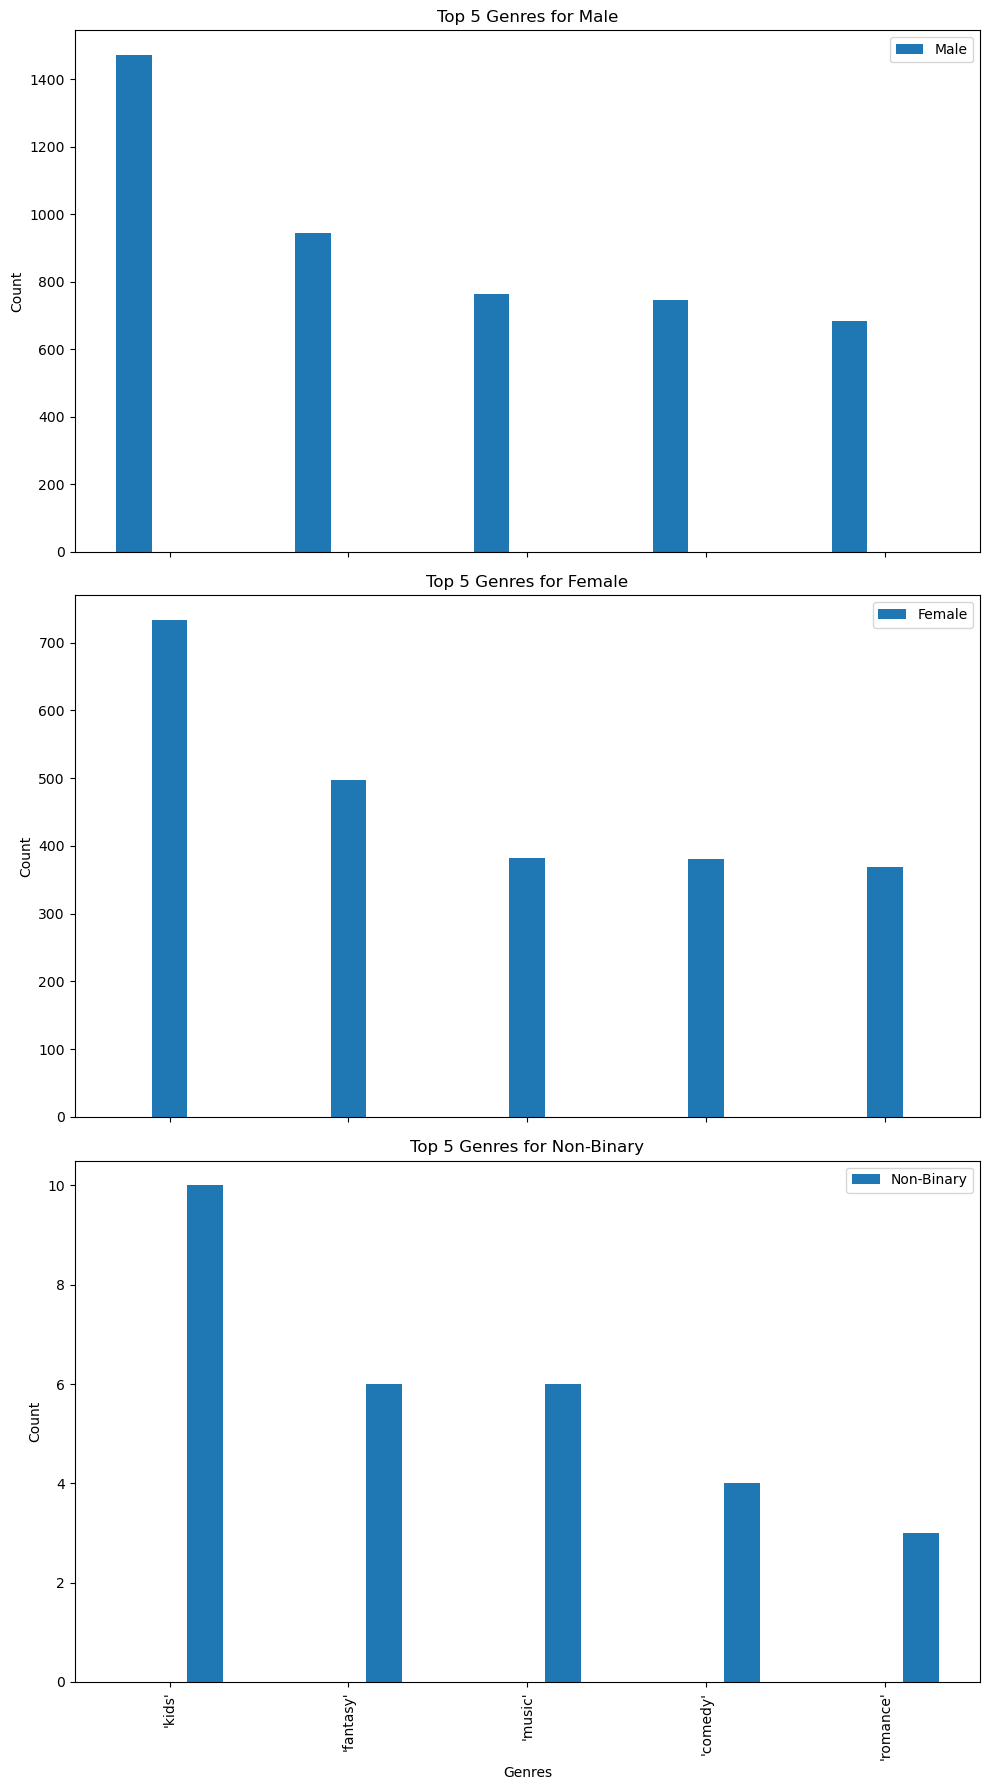

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# Initialize dictionaries to store top genres and counts for each gender
top_genres_by_gender = {}
top_genres = {}
top_counts = {}

# Iterate over each gender
for gender in genders:
    # Filter the DataFrame based on gender
    subset = a_rev_prof[a_rev_prof['gender'] == gender]
    
    # Flatten the list of lists into a single list of strings
    genres_flat = [genre for sublist in subset['genre_list'] for genre in sublist]
    
    # Count the occurrences of each genre
    count = Counter(genres_flat).most_common(5)
    
    # Store the top genres and counts for the current gender
    top_genres_by_gender[gender] = count
    top_genres[gender] = [genre[0] for genre in count]
    top_counts[gender] = [genre[1] for genre in count]

# Plot grouped bar plot for each gender
bar_width = 0.2
fig, axs = plt.subplots(len(genders), 1, figsize=(10, 6 * len(genders)), sharex=True)

for i, gender in enumerate(genders):
    index = range(len(top_genres[gender]))
    axs[i].bar([x + i * bar_width for x in index], top_counts[gender], bar_width, label=gender)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Top 5 Genres for {gender}')
    axs[i].set_xticks([x + bar_width for x in index])
    axs[i].set_xticklabels(top_genres[gender], rotation=90)
    axs[i].legend()

plt.xlabel('Genres')
plt.tight_layout()
plt.show()


In [16]:
genres = ['comedy', 'action', 'adventure', 'fantasy', 'drama', 'sci-fi', 'kids', 'shounen','romance','slice-of-life', 'music','school', 'supernatural','hentai', 'mecha', 'magic'
         ,'historical', 'seinen', 'ecchi', 'mystery', 'shoujo', 'sports', 'military','super-power','parody', 'space', 'horror', 'demons'
         , 'dementia', 'harem' , 'martial-arts', 'psychological', 'game','police', 'samurai', 'vampire', 'cars', 'thriller', 'shounen-ai'
         , 'yaoi' , 'yuri']
avg_episodes_by_genre = {}
a_rev_prof['genre_list'] = a_rev_prof['genre_list'].apply(lambda x: [genre.strip("'") for genre in x])
for genre in genres:
    # Check if the genre is present in any of the lists within 'genre_list'
    subset = a_rev_prof[a_rev_prof['genre_list'].apply(lambda x: genre.lower() in map(str.lower, x))]
    total_episodes = subset['episodes'].sum()
    total_entries = subset.shape[0]  # Number of entries for the genre
    if total_entries != 0:
        avg_episodes = total_episodes / total_entries
    else:
        avg_episodes = 0  # Handle division by zero
    avg_episodes_by_genre[genre] = avg_episodes
    
for genre, avg_episodes in avg_episodes_by_genre.items():
    print(f"Average number of episodes for \033[1m{genre}\033[0m: {avg_episodes}")

Average number of episodes for comedy: 19.200226671703817
Average number of episodes for action: 13.088133640552995
Average number of episodes for adventure: 17.884500745156483
Average number of episodes for fantasy: 12.896350364963503
Average number of episodes for drama: 10.798069187449718
Average number of episodes for sci-fi: 12.499585062240664
Average number of episodes for kids: 16.767485822306238
Average number of episodes for shounen: 18.436363636363637
Average number of episodes for romance: 11.656455142231948
Average number of episodes for slice-of-life: 18.96273291925466
Average number of episodes for music: 3.7271604938271605
Average number of episodes for school: 13.052631578947368
Average number of episodes for supernatural: 11.536144578313253
Average number of episodes for hentai: 2.0985915492957745
Average number of episodes for mecha: 14.758095238095239
Average number of episodes for magic: 15.151138716356108
Average number of episodes for historical: 17.44171779141104

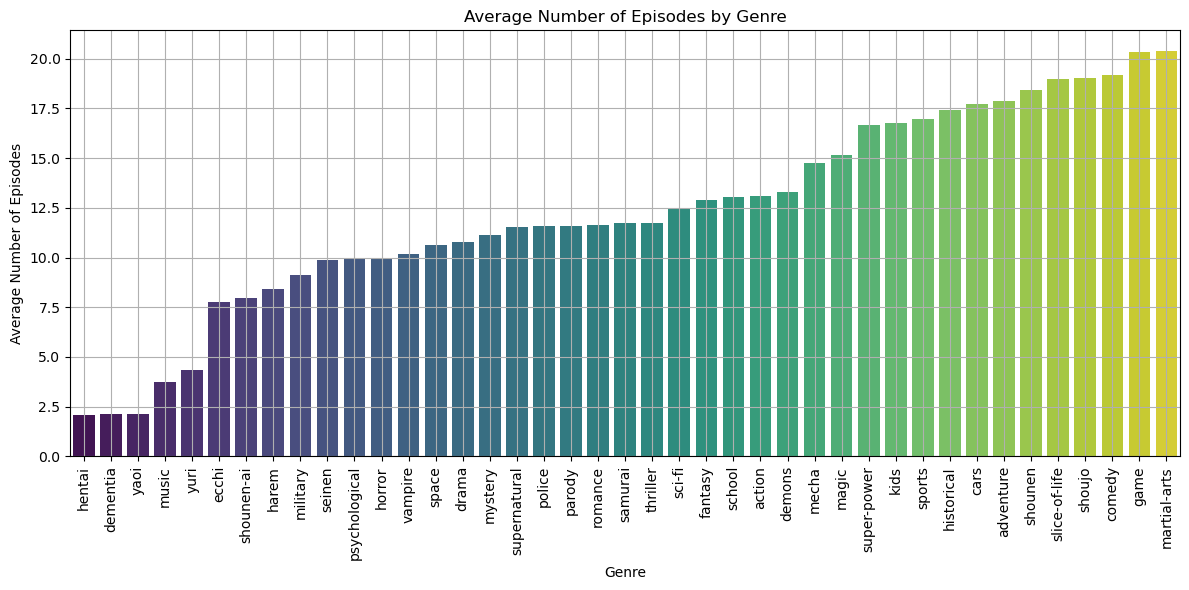

In [17]:
# Convert dictionary to DataFrame for plotting
df = pd.DataFrame(list(avg_episodes_by_genre.items()), columns=['Genre', 'Average Number of Episodes'])

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Genre', y='Average Number of Episodes', palette='viridis',order=df.sort_values('Average Number of Episodes').Genre)
plt.title('Average Number of Episodes by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Number of Episodes')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Create a defaultdict to store the total number of members and counts for each genre
genre_member_counts = defaultdict(lambda: {'total_members': 0, 'count': 0})

# Iterate over each row in the DataFrame
for genres, members in zip(a_rev_prof['genre_list'], a_rev_prof['members']):
    # Iterate over each genre in the list of genres for the current row
    for genre in genres:
        # Increment the total number of members and count for the current genre
        genre_member_counts[genre]['total_members'] += members
        genre_member_counts[genre]['count'] += 1

# Calculate the average number of members for each genre
average_members_by_genre = {}
for genre, data in genre_member_counts.items():
    total_members = data['total_members']
    count = data['count']
    # Calculate the average number of members, handling the case where count is 0 to avoid division by zero
    if count != 0:
        average_members = total_members / count
    else:
        average_members = 0  # Set average members to 0 if there are no members for the genre
    average_members_by_genre[genre] = average_members

# Print the average number of members for each genre
for genre, average_members in average_members_by_genre.items():
    print(f"Average members for {genre}: {average_members}")

Average members for drama: 58051.255832662915
Average members for music: 8983.424691358025
Average members for romance: 79516.44967177243
Average members for school: 80114.66801619434
Average members for shounen: 62604.53582887701
Average members for sci-fi: 40343.536929460584
Average members for adventure: 37893.69672131148
Average members for mystery: 95542.78635014837
Average members for fantasy: 43895.13722627737
Average members for action: 57261.52131336406
Average members for supernatural: 91557.09186746988
Average members for vampire: 118358.0
Average members for comedy: 41531.08953532301
Average members for super-power: 79078.45578231293
Average members for military: 51601.61355932203
Average members for space: 20717.84051724138
Average members for mecha: 28659.211428571427
Average members for shoujo: 37055.95166163142
Average members for slice-of-life: 42661.857142857145
Average members for demons: 53530.80373831776
Average members for magic: 44000.17391304348
Average members 

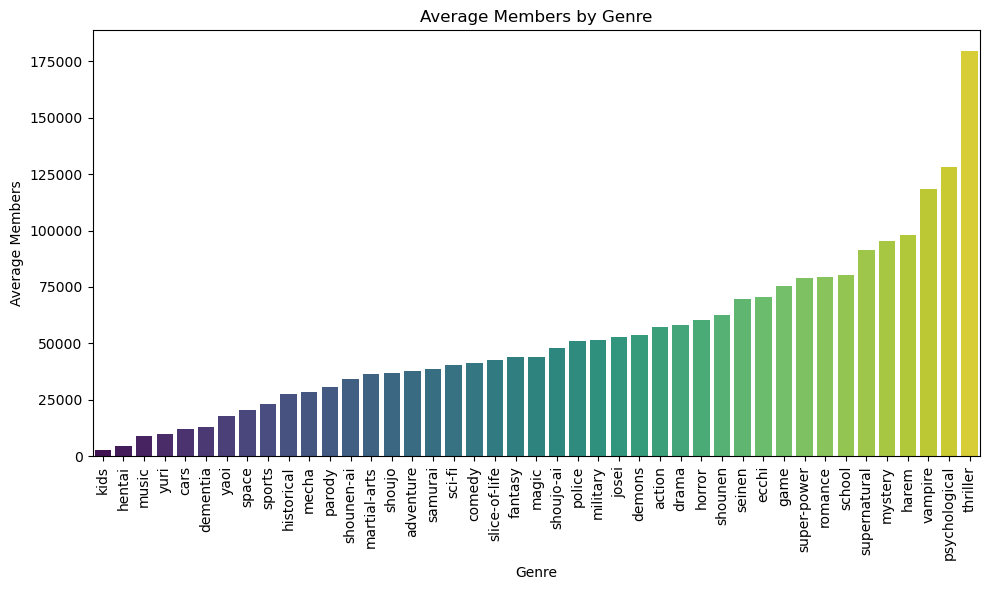

In [19]:
# Convert the dictionary to a DataFrame
genre_data = {'Genre': list(average_members_by_genre.keys()), 
              'Average Members': list(average_members_by_genre.values())}
average_members_df = pd.DataFrame(genre_data)

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=average_members_df, x='Genre', y='Average Members', palette='viridis',order=average_members_df.sort_values('Average Members').Genre)
plt.title('Average Members by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Members')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

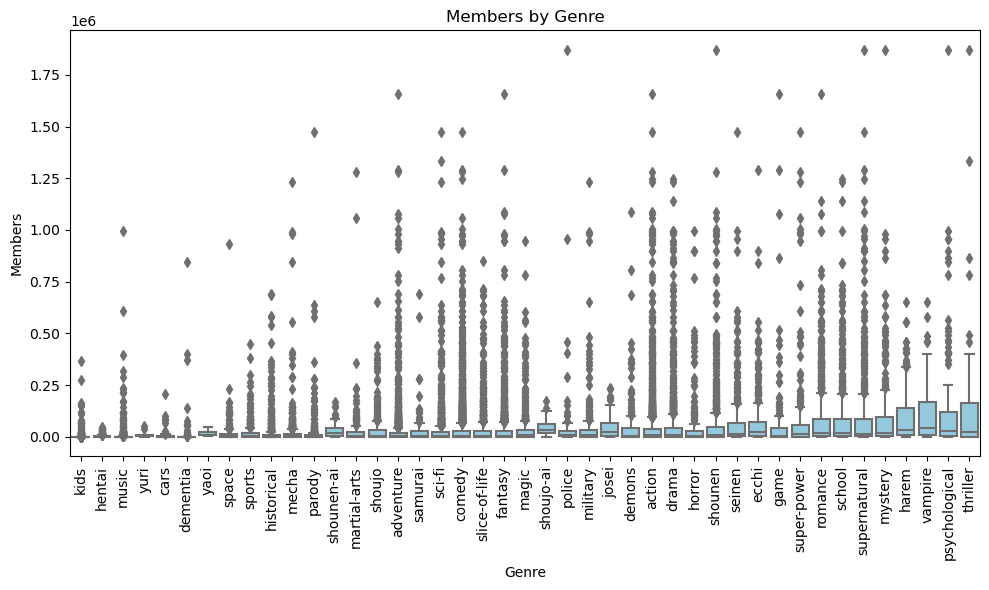

In [20]:
# Create a list to store the reshaped data
data = []

# Iterate over each row in the DataFrame
for index, row in a_rev_prof.iterrows():
    # Iterate over each genre in the list of genres for the current row
    for genre in row['genre_list']:
        # Append a tuple containing the genre and members for the current anime-genre pair
        data.append((genre, row['members']))

# Create a DataFrame from the reshaped data
members_df = pd.DataFrame(data, columns=['Genre', 'Members'])

mean_by_genre = members_df.groupby(['Genre'])['Members'].mean().sort_values(ascending=True)


# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=members_df, x='Genre', y='Members', color='skyblue', order=mean_by_genre.index)
plt.title('Members by Genre')
plt.xlabel('Genre')
plt.ylabel('Members')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [21]:
# Create a defaultdict to store total scores and counts for each genre
genre_scores = defaultdict(lambda: {'total_score': 0, 'count': 0})

# Iterate over each row in the DataFrame
for index, row in a_rev_prof.iterrows():
    genres = row['genre_list']  # Assuming the column containing genre lists is named 'genre_list'
    score = row['score_x']  # Assuming the column containing scores is named 'score'
    # Check if the score is not NaN
    if not pd.isna(score):
        # Iterate over each genre in the list of genres for the current row
        for genre in genres:
            genre = genre.strip()  # Remove leading and trailing whitespaces
            # Update the total score and count for the current genre
            genre_scores[genre]['total_score'] += score
            genre_scores[genre]['count'] += 1

# Calculate the average score for each genre
average_scores_by_genre = {}
for genre, data in genre_scores.items():
    total_score = data['total_score']
    count = data['count']
    # Calculate the average score, handling the case where count is 0 to avoid division by zero
    if count != 0:
        average_score = total_score / count
    else:
        average_score = None  # Set average score to None if there are no scores for the genre
    average_scores_by_genre[genre] = average_score

# Print the average score for each genre
for genre, average_score in average_scores_by_genre.items():
    if average_score is not None:
        print(f"Average score for {genre}: {average_score:.2f}")
    else:
        print(f"No scores available for {genre}")

# Convert the average_scores_by_genre dictionary to a DataFrame
average_scores_df = pd.DataFrame(list(average_scores_by_genre.items()), columns=['Genre', 'Average Score'])

# Remove rows with NaN values (genres with no scores)
average_scores_df = average_scores_df.dropna()




Average score for drama: 6.94
Average score for music: 5.71
Average score for romance: 6.95
Average score for school: 6.92
Average score for shounen: 7.00
Average score for sci-fi: 6.62
Average score for adventure: 6.68
Average score for mystery: 7.16
Average score for fantasy: 6.64
Average score for action: 6.73
Average score for supernatural: 6.88
Average score for vampire: 6.92
Average score for comedy: 6.60
Average score for super-power: 6.76
Average score for military: 6.88
Average score for space: 6.61
Average score for mecha: 6.58
Average score for shoujo: 6.93
Average score for slice-of-life: 6.67
Average score for demons: 6.66
Average score for magic: 6.77
Average score for horror: 6.40
Average score for historical: 6.65
Average score for parody: 6.22
Average score for hentai: 6.18
Average score for kids: 5.93
Average score for samurai: 6.66
Average score for police: 7.00
Average score for seinen: 7.01
Average score for cars: 6.22
Average score for ecchi: 6.59
Average score fo

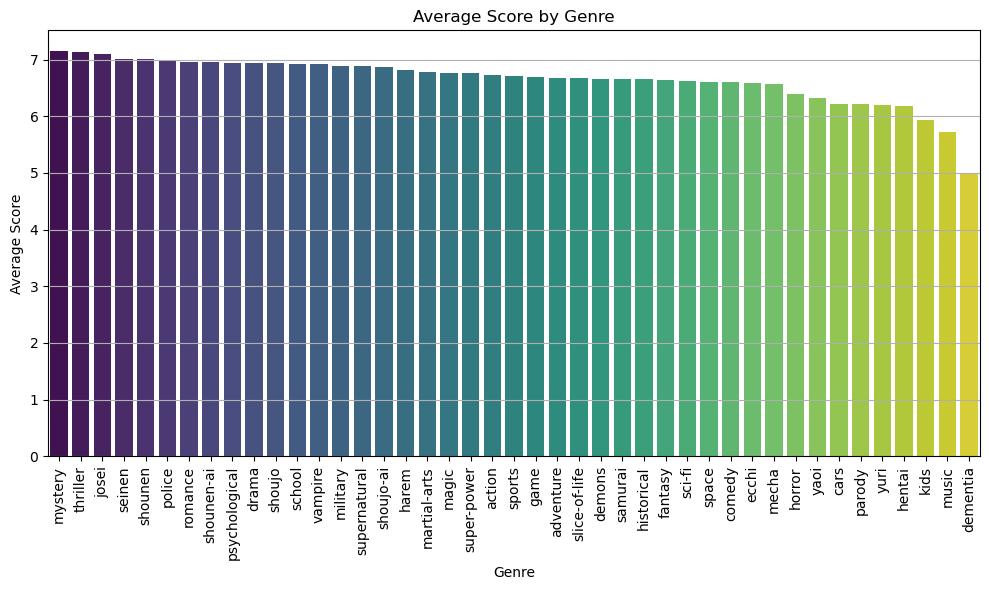

In [22]:
# Plot a bar plot
plt.figure(figsize=(10, 6))
average_scores_df_sorted = average_scores_df.sort_values(by='Average Score', ascending=False)
sns.barplot(data=average_scores_df_sorted, x='Genre', y='Average Score', palette='viridis')
plt.title('Average Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Add grid lines only along the y-axis
plt.tight_layout()
plt.show()

<Axes: >

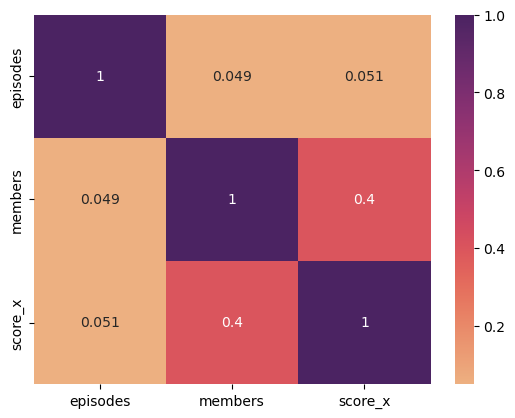

In [24]:
anime = a_rev_prof[['episodes', 'members', 'score_x']]
sns.heatmap(anime.corr(), annot=True, cmap='flare')